# Implement a method in youtube  video

In [11]:
# https://www.youtube.com/watch?v=jFa6u-7E10U

### Import Library

In [12]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [13]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir.parent) + '/VN30F1M/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [14]:
data = dataset.copy()

In [15]:
data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]

In [16]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2024-09-30 14:15:00,1353.1,1353.9,1351.5,1353.1,6265
2024-09-30 14:20:00,1353.0,1354.7,1352.6,1354.6,4426
2024-09-30 14:25:00,1354.6,1356.3,1354.1,1355.9,7920


In [17]:
first_hour = data.groupby(data.index.date).first()
last_hour = data.groupby(data.index.date).last()

In [18]:
first_hour

,Open,High,Low,Close,Volume
2020-11-02,900.1,900.2,899.3,900.1,1910
2020-11-03,909.3,909.4,908.5,908.8,1435
2020-11-04,909.0,909.9,908.8,908.9,1444
2020-11-05,913.7,914.7,913.6,913.6,2193
2020-11-06,911.2,912.0,911.2,911.9,1714
...,...,...,...,...,...
2024-09-24,1326.0,1326.0,1325.3,1325.3,3123
2024-09-25,1337.3,1338.5,1336.9,1337.6,6004
2024-09-26,1345.9,1346.5,1345.2,1346.4,4948
2024-09-27,1358.1,1359.0,1357.7,1358.0,5435


In [19]:
first_hour_return = 100 * (first_hour['Close'] - first_hour['Open']) / (first_hour['Open'])

In [20]:
day_return = 100 * (last_hour['Close'] - first_hour['Close']) / first_hour['Close']

In [22]:
df_analytics = pd.DataFrame({'first_hour_return': first_hour_return, 'day_return': day_return})

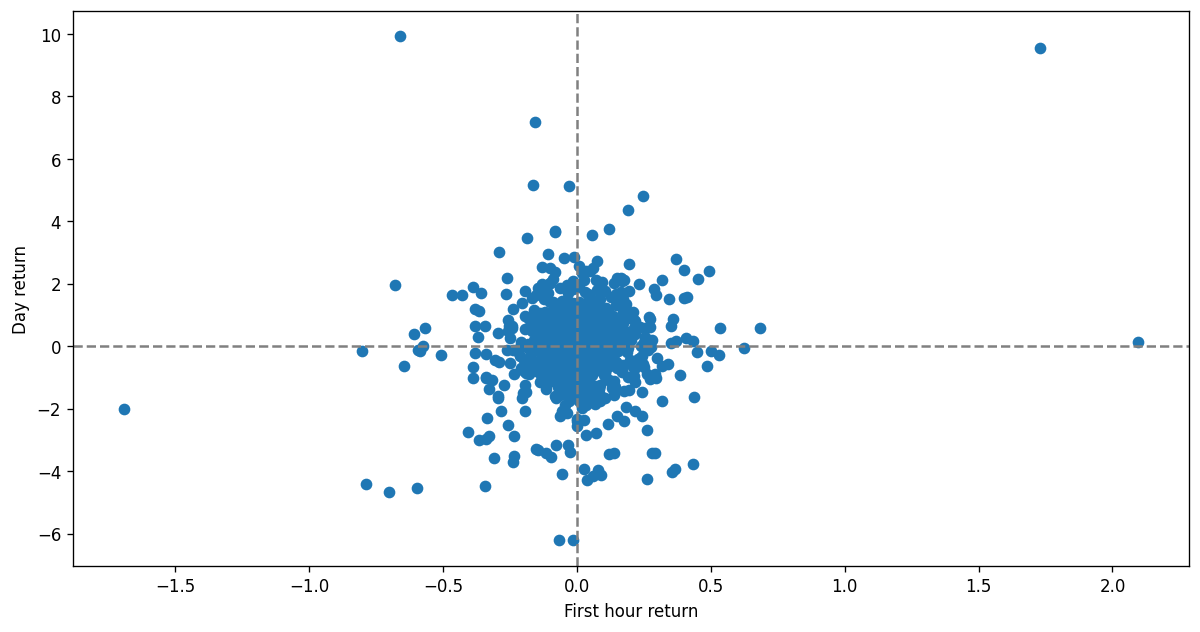

In [23]:
plt.scatter(df_analytics['first_hour_return'], df_analytics['day_return'])
plt.xlabel('First hour return')
plt.ylabel('Day return')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

In [24]:
correlation = df_analytics.corr().loc['first_hour_return', 'day_return']

In [25]:
correlation

0.10995102528197938

In [26]:
from scipy.stats import pearsonr

In [27]:
corr, p_val = pearsonr(df_analytics['first_hour_return'], df_analytics['day_return'])

In [28]:
corr

0.10995102528197931

In [29]:
p_val

0.0005795352408316724